In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.drop(['Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Glucose   768 non-null    int64  
 1   Insulin   768 non-null    int64  
 2   BMI       768 non-null    float64
 3   Pedigree  768 non-null    float64
 4   Age       768 non-null    int64  
 5   Outcome   768 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 36.1 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
#aiming to impute nan values for the columns in accordance
#with their distribution
df[['Glucose','Insulin','BMI']].replace(0,np.NaN)

,Glucose,Insulin,BMI
0,148.0,NaN,33.6
1,85.0,NaN,26.6
2,183.0,NaN,23.3
3,89.0,94.0,28.1
4,137.0,168.0,43.1
...,...,...,...
763,101.0,180.0,32.9
764,122.0,NaN,36.8
765,121.0,112.0,26.2
766,126.0,NaN,30.1


In [7]:
columns = ['Glucose','Insulin','BMI']
for col in columns:
 val = df[col].mean()
 df[col].replace(0, val)

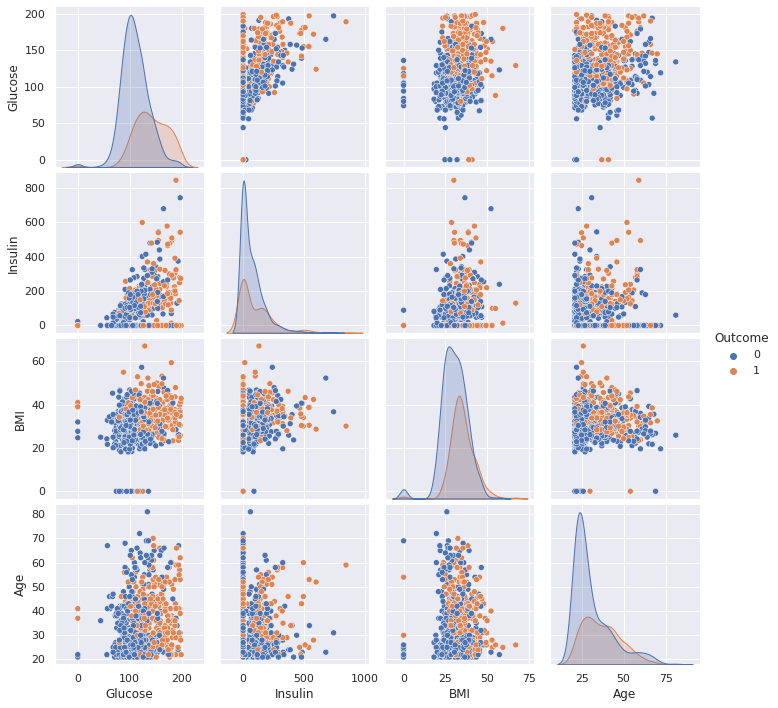

In [8]:
#plot graph
graph = ['Glucose','Insulin','BMI','Age','Outcome']
sns.set()
print(sns.pairplot(df[graph],hue='Outcome', diag_kind='kde'))

In [9]:
#separate outcome or target col
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [13]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [16]:
# evaluating model
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[93 14]
 [18 29]]


In [17]:
print(f1_score(y_test,y_pred))

0.6444444444444444


In [18]:
# accuracy
print(accuracy_score(y_test,y_pred))

0.7922077922077922


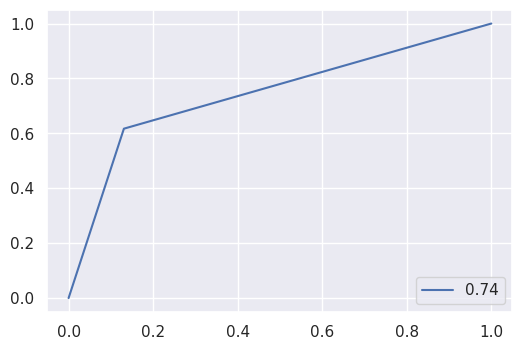

In [19]:
# roc curve
from sklearn.metrics import roc_curve
plt.figure(dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
from sklearn.metrics import roc_auc_score
temp=roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label = "%.2f" %temp)
plt.legend(loc = 'lower right')
plt.grid(True)